# Bank Marketing

## Import Libraries

In [81]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read data

In [2]:
bData = pd.read_csv("bank-full.csv")  
bData.shape

(45211, 17)

In [3]:
bData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
bData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Checking for nulls 

In [6]:
bData.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Checking for NaN

In [7]:
bData.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
bData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

Now, all data in DataFrame is a numeric type

# Univariate

In [9]:
bData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [10]:
bData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
bData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
bData.apply(lambda x: len(x.unique()))


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

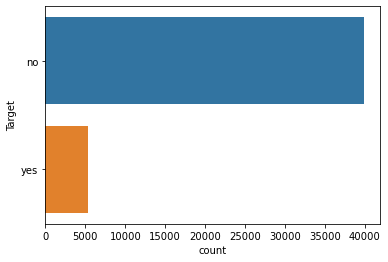

In [13]:
sns.countplot(y='Target', data=bData);

In [14]:
bData.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\to

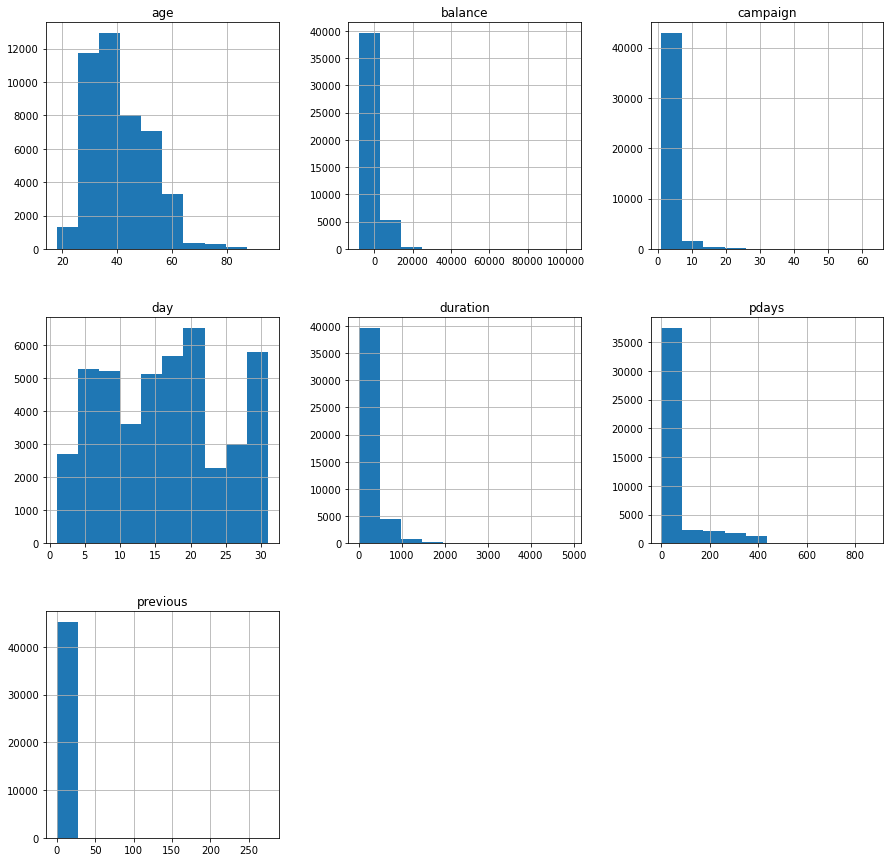

In [15]:
bData.hist(figsize=(15,15));
plt.show()

Check for Skweness

In [16]:
bData.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

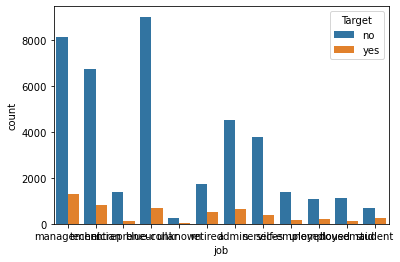

In [17]:
sns.countplot(x='job',hue='Target',data=bData);

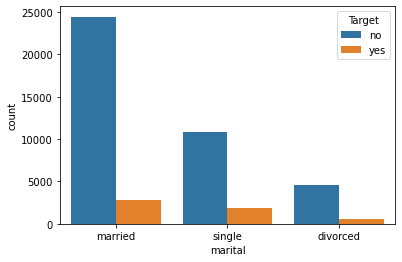

In [18]:
sns.countplot(x='marital',hue='Target',data=bData);

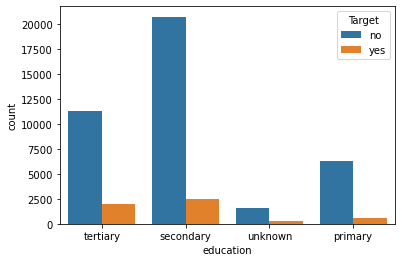

In [19]:
sns.countplot(x='education',hue='Target',data=bData);

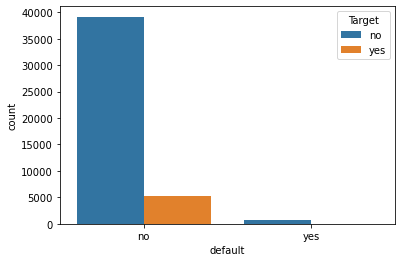

In [20]:
sns.countplot(x='default',hue='Target',data=bData);

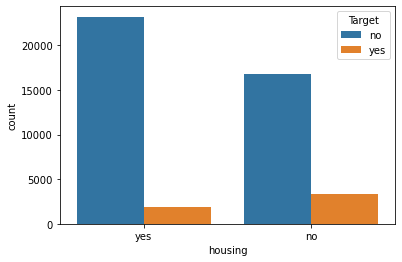

In [21]:
sns.countplot(x='housing',hue='Target',data=bData);

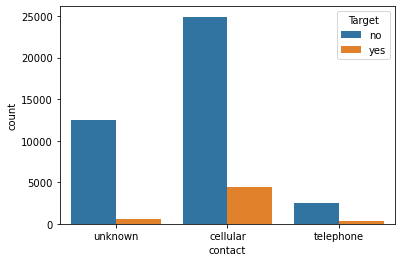

In [22]:
sns.countplot(x='contact',hue='Target',data=bData);

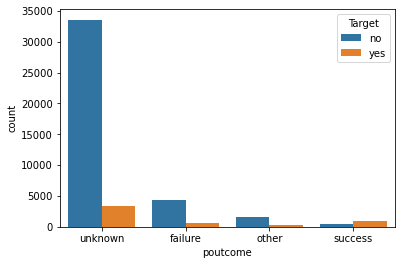

In [23]:
sns.countplot(x='poutcome',hue='Target',data=bData);

## Bivariate

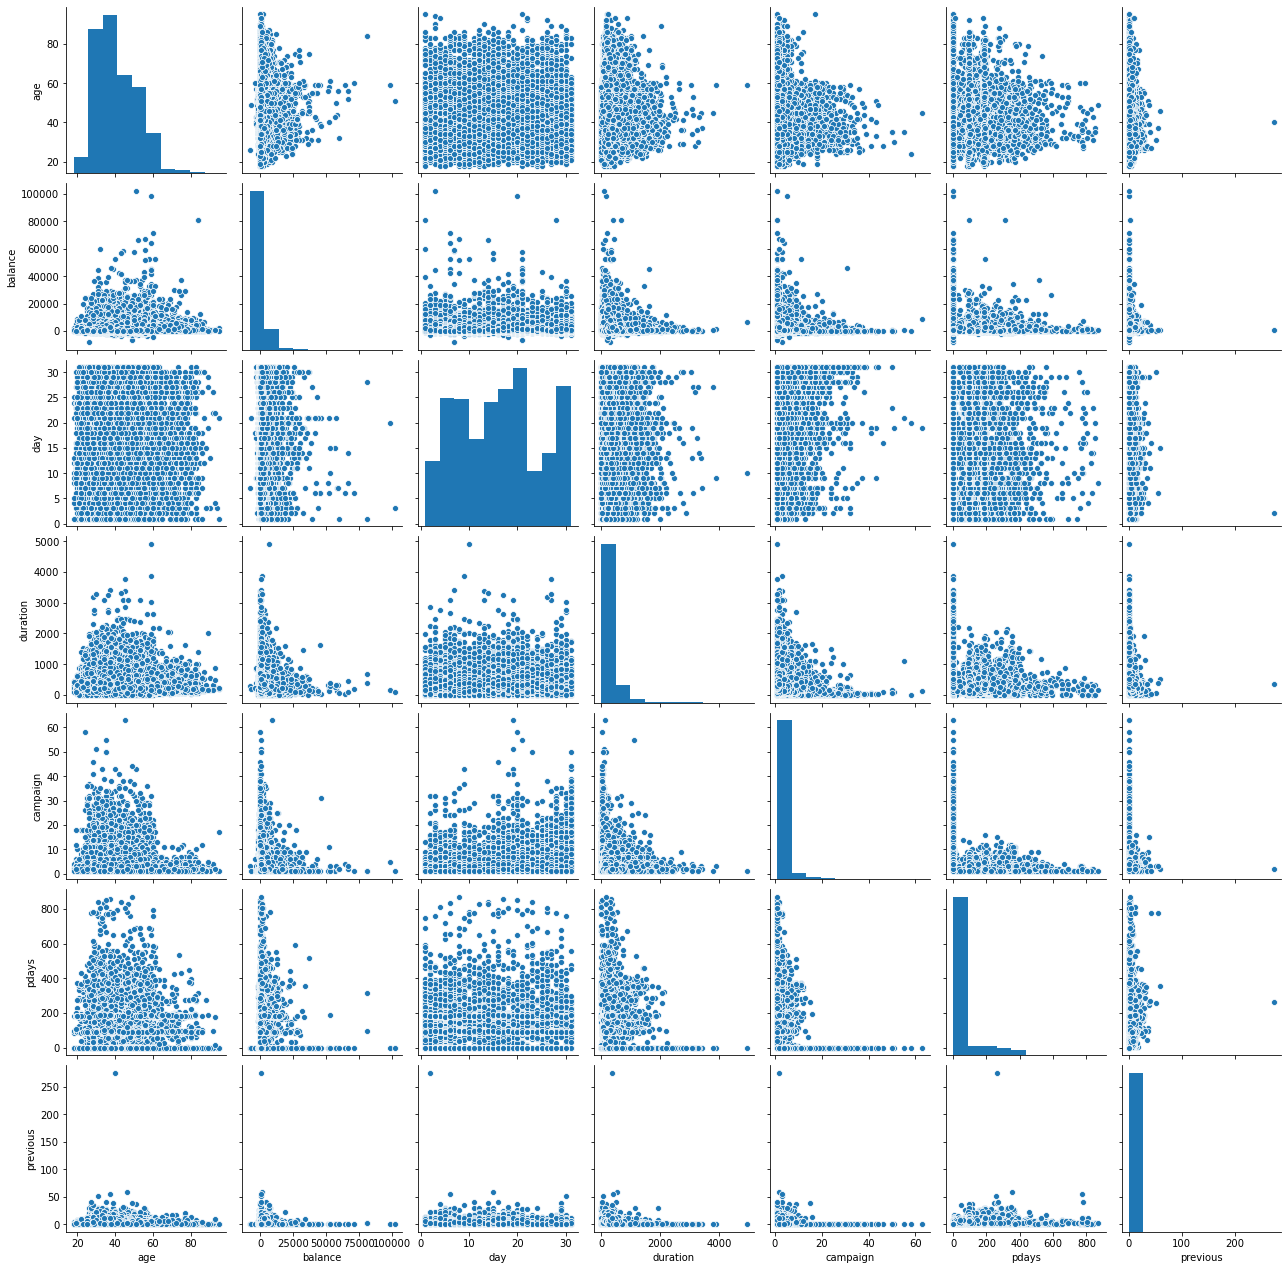

In [24]:
sns.pairplot(bData);

In [25]:
le = preprocessing.LabelEncoder()
bData['job'] = le.fit_transform(bData['job'])
bData['marital'] = le.fit_transform(bData['marital'])
bData['education'] = le.fit_transform(bData['education'])
bData['default'] = le.fit_transform(bData['default'])
bData['balance'] = le.fit_transform(bData['balance'])
bData['housing'] = le.fit_transform(bData['housing'])
bData['contact'] = le.fit_transform(bData['contact'])
bData['loan'] = le.fit_transform(bData['loan'])
bData['day'] = le.fit_transform(bData['day'])
bData['month'] = le.fit_transform(bData['month'])
bData['previous'] = le.fit_transform(bData['previous'])
bData['Target'] = le.fit_transform(bData['Target'])

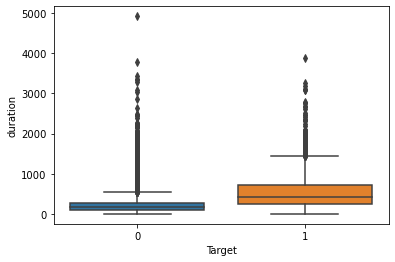

In [26]:
sns.boxplot(x='Target', y='duration', data=bData);

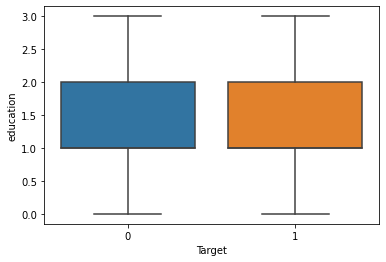

In [27]:
sns.boxplot(x='Target', y='education', data=bData);

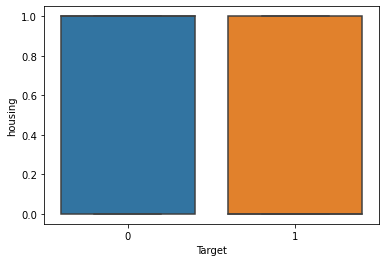

In [28]:
sns.boxplot(x='Target', y='housing', data=bData);

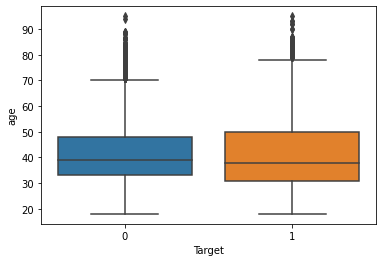

In [29]:
sns.boxplot(x='Target', y='age', data=bData);

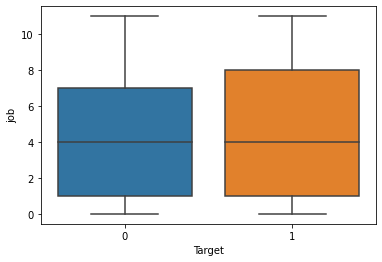

In [30]:
sns.boxplot(x='Target', y='job', data=bData);

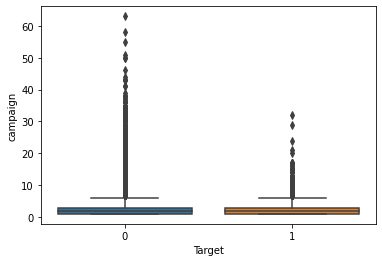

In [31]:
sns.boxplot(x='Target', y='campaign', data=bData);

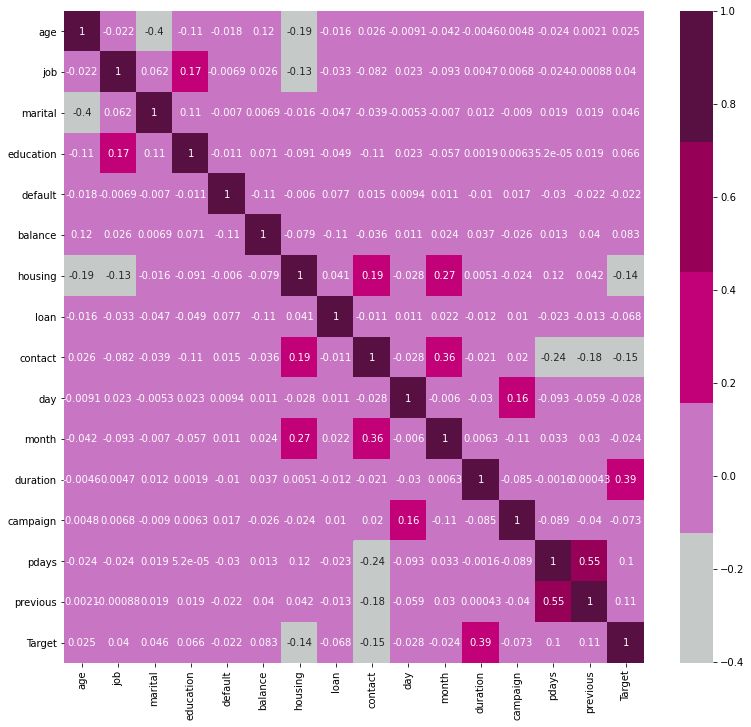

In [32]:
fig, ax = plt.subplots(figsize=(13,12))
xcolors = ["silver", "orchid", "magenta", "dark magenta","plum"]
sns.heatmap(bData.corr(), annot=True, cmap=sns.xkcd_palette(xcolors));

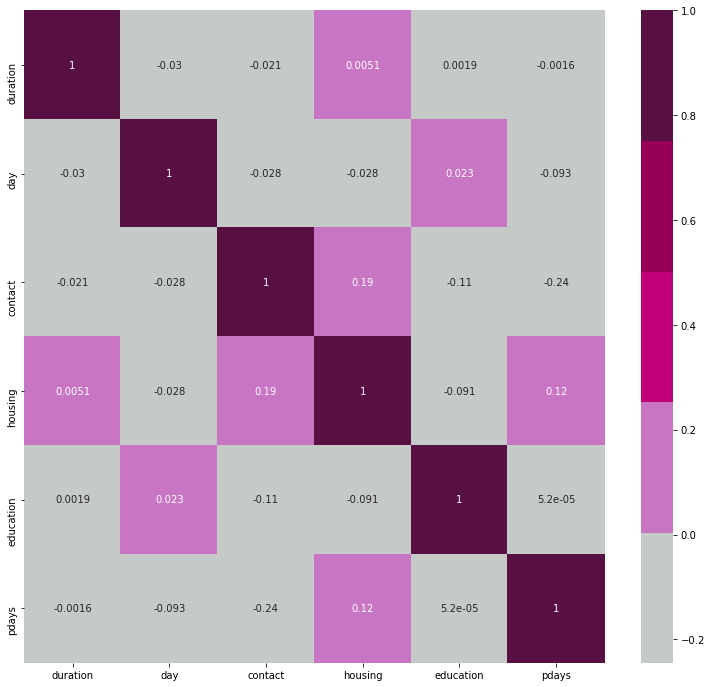

In [33]:
fig, ax = plt.subplots(figsize=(13,12))
xcolors = ["silver", "orchid", "magenta", "dark magenta","plum"]
hmvars = ['duration', 'day', 'contact', 'housing', 'education', 'pdays']
sns.heatmap(bData[hmvars].corr(), annot=True, cmap=sns.xkcd_palette(xcolors));

Dropping less meaningful features 

In [34]:
# Drop poutcome fueature because it has many 'unknown' values
bData = bData.drop('poutcome', axis = 1)
bData = bData.drop('default', axis = 1)

## Split training set and test set

In [35]:
bData['Target'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Target, dtype: float64

In [36]:
x = bData.drop('Target', axis = 1)
y = bData['Target']

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=1)

Creating and fitting the models

In [74]:
# import libraries for every model

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix


from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC


In [100]:
def anyModelFit(name, model):
    global results
    global  xtrain, ytrain, xtest, ytest
    global ax 
    
    #fitting the model and getting its predictions
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    
    #getting performance metrics
    scoreTr = model.score(xtrain, ytrain)
    scoreTs = model.score(xtest, ytest)
    roc = roc_auc_score(ytest, pred)
    acc = accuracy_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    recall = recall_score(ytest, pred)
    prec = precision_score(ytest, pred, average='weighted', zero_division = 0)

    #visualizations of ROCAUC
    viz = ROCAUC(model, ax=axes[ax][0])
    viz.fit(xtrain, ytrain)
    viz.score(xtest, ytest)
    viz.finalize()

    #visualize the confusion matrix
    cm = confusion_matrix(ytest, pred)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1],  ax=axes[ax][1])   
    
    
    dd = {'Method':name, 'ScoreTrain':scoreTr, 'ScoreTest':scoreTs, 'ROC':roc, 'Acuracy':acc, 'f1':f1, 'Recall':recall, 'Precision': prec}
    results = results.append(dd, ignore_index=True)
    
    #BaggingClassifier does not have feature importances to make FeatureImportances visualization
    if name not in ['Bagging']:      
        viz2 = FeatureImportances(model, ax=axes[ax][2])
        viz2.fit(xtrain, ytrain)
        viz2.score(xtest, ytest)
        viz2.finalize()
        
    ax = ax + 1

Linear Regression

In [103]:
def LRMFit(name, model):
    global results
    
    model.fit(xtrain, ytrain)
    scoreTr = lr.score(xtrain, ytrain)
    scoreTs = lr.score(xtest, ytest)
    roc = np.NAN
    acc = np.NAN
    f1 = np.NAN
    recall = np.NAN
    prec = np.NAN

    dd = {'Method':name, 'ScoreTrain':scoreTr, 'ScoreTest':scoreTs, 'ROC':roc, 'Acuracy':acc, 'f1':f1, 'Recall':recall, 'Precision': prec}
    results = results.append(dd, ignore_index=True)

Ensamble Techniques

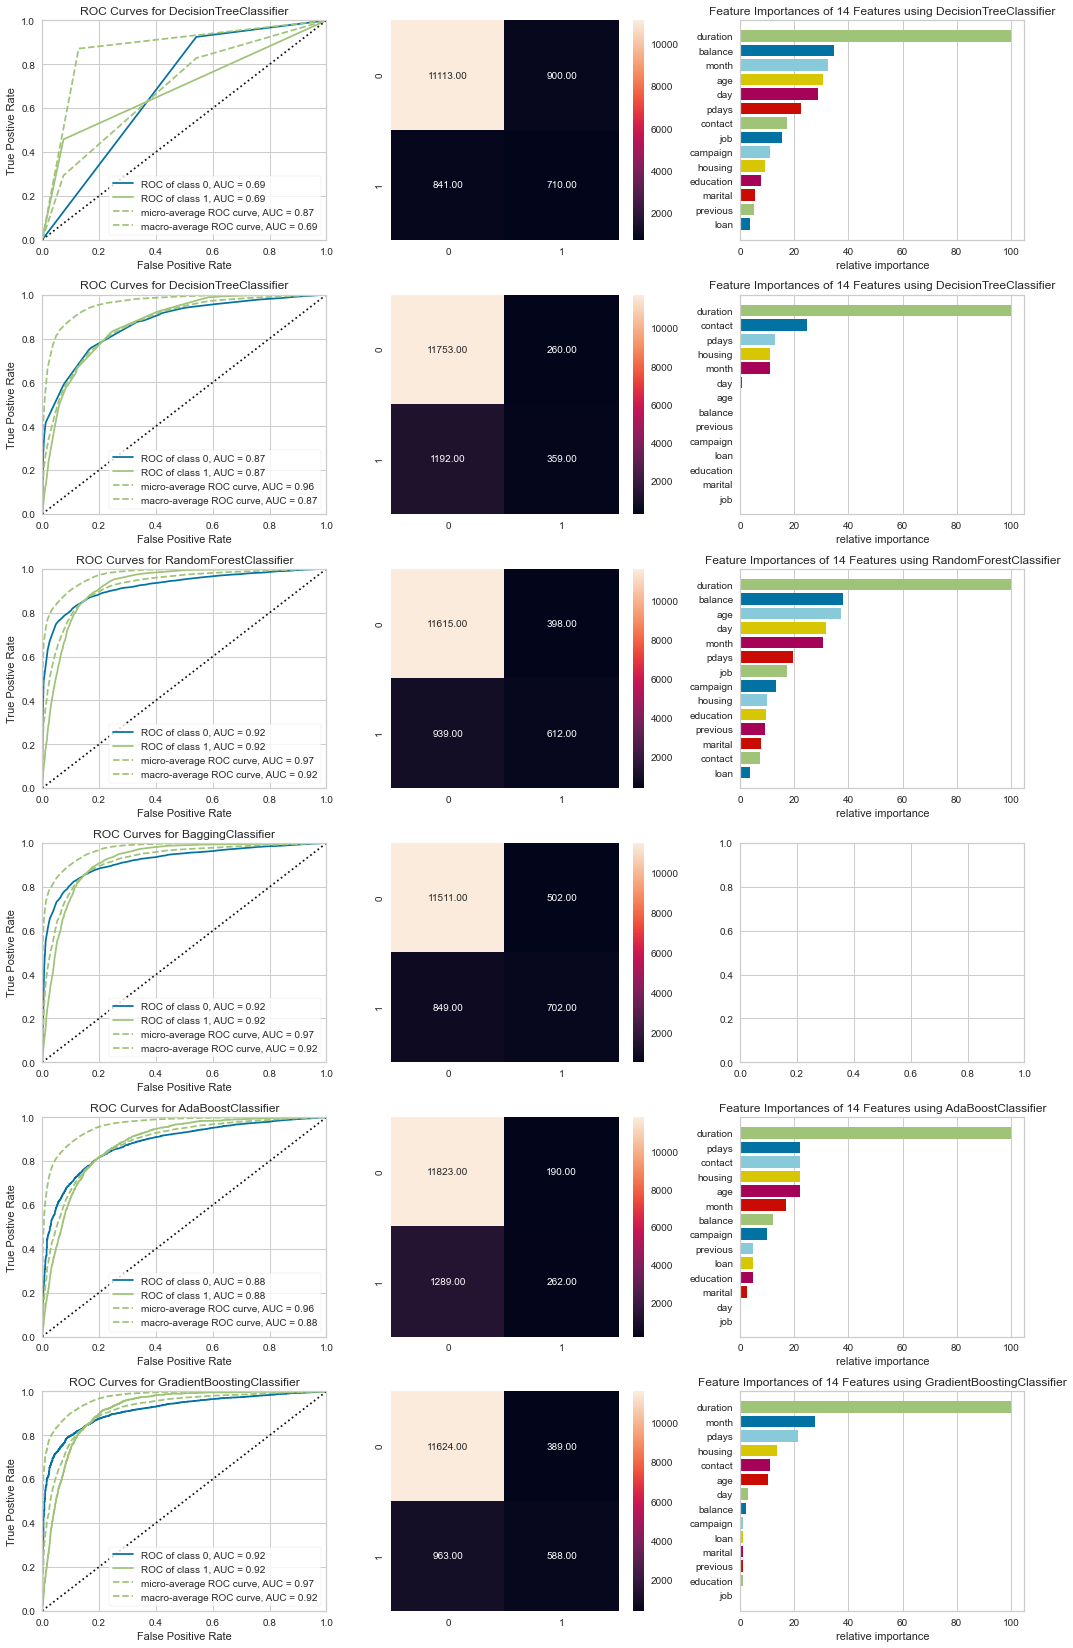

,Method,ScoreTrain,ScoreTest,ROC,Acuracy,f1,Recall,Precision
0,LinearR,0.217525,0.196809,NaN,NaN,NaN,NaN,NaN
1,DTree,1.000000,0.871646,0.691425,0.871646,0.449225,0.457769,0.873771
2,PrunedTree,0.894208,0.892952,0.604910,0.892952,0.330876,0.231464,0.870418
3,RndmForest,0.999968,0.901430,0.680727,0.901430,0.477938,0.394584,0.888696
4,Bagging,0.996872,0.900398,0.705412,0.900398,0.509619,0.452611,0.891489
5,AdaBoost,0.889879,0.890961,0.576554,0.890961,0.261608,0.168923,0.864868
6,GrdntBoost,0.906689,0.900324,0.673364,0.900324,0.465190,0.379110,0.886713


In [104]:
results = pd.DataFrame(columns=['Method', 'ScoreTrain', 'ScoreTest', 'ROC', 'Acuracy', 'f1', 'Recall','Precision'])
fig, axes = plt.subplots(6, 3, figsize=(15,23))
ax = 0
nstimators = 100

LRMFit('LinearR', LinearRegression() )
anyModelFit('DTree'     , DecisionTreeClassifier(criterion='entropy'))
anyModelFit('PrunedTree', DecisionTreeClassifier(criterion='entropy', max_depth=5))
anyModelFit('RndmForest', RandomForestClassifier(n_estimators=nstimators))
anyModelFit('Bagging'   , BaggingClassifier(n_estimators=nstimators, max_samples=0.7, bootstrap=True, oob_score=True, random_state=22))
anyModelFit('AdaBoost'  , AdaBoostClassifier(n_estimators=nstimators, learning_rate=0.1, random_state=22))
anyModelFit('GrdntBoost', GradientBoostingClassifier(n_estimators=nstimators, learning_rate=0.1, random_state=22))

plt.show()
results

# Conclusions

After comparing these 6 different algorithms of Ensamble Techniques (DecisionTreeClassifier, Pruned DecisionTreeClassifier, Random Forest, Bagging, AdaBoost, and Gradient Boost), it is very clear that the Random Forest and Bagging methods have the better performance overall in this particular case.

In order to make the most effective campaign, Baggins is a slightly better method than the Random Forest method. In both methods, the Score is almost the same, Random Forest - 0.901430, Baggings - 0.900398. 
Baggins is identifying more false negatives than Random Forest. Recall metrics are 0.452611 and  0.394584 respectively. The same happens with F1 metrics: 0.477938 for Forest Method and 0.509619 for Baggins.   

The "duration" feature is the most important feature in this case. It could explain the time taken to explain the product's characteristics, and/or the time taken to ask for the customer's data. Balance, Contact features are the second most important features. 


